# 6. 챗봇 만들기
## 데이터 분석

In [3]:
import pandas as pd

data_path = './data_in/'
data = pd.read_csv(data_path + "ChatBotData.csv", encoding="utf-8")

In [4]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [5]:
sentences = list(data['Q']) + list(data['A'])

* 분석 기준:
    * 문자 단위의 길이 분석(음절)
    * 단어 단위의 길이 분석(어절)
    * 형태소 단위의 길이 분석

In [6]:
# 형태소
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]

In [7]:
from konlpy.tag import Okt

okt = Okt()

morph_tokenized_sentences = [okt.morphs(s) for s in sentences]


In [8]:
morph_tokenized_sentences

[['12시', '땡', '!'],
 ['1', '지망', '학교', '떨어졌어'],
 ['3', '박', '4일', '놀러', '가고', '싶다'],
 ['3', '박', '4일', '정도', '놀러', '가고', '싶다'],
 ['PPL', '심하네'],
 ['SD', '카드', '망가졌어'],
 ['SD', '카드', '안', '돼'],
 ['SNS', '맞팔', '왜', '안', '하지', 'ㅠㅠ'],
 ['SNS', '시간', '낭비', '인', '거', '아는데', '매일', '하는', '중'],
 ['SNS', '시간', '낭비', '인데', '자꾸', '보게', '됨'],
 ['SNS', '보면', '나', '만', '빼고', '다', '행복', '해보여'],
 ['가끔', '궁금해'],
 ['가끔', '뭐', '하는지', '궁금해'],
 ['가끔', '은', '혼자', '인게', '좋다'],
 ['가난한', '자의', '설움'],
 ['가만', '있어도', '땀', '난다'],
 ['가상', '화폐', '쫄딱', '망함'],
 ['가스', '불', '켜고', '나갔어'],
 ['가스', '불', '켜놓고', '나온거', '같아'],
 ['가스', '비', '너무', '많이', '나왔다', '.'],
 ['가스', '비', '비싼데', '감기', '걸리겠어'],
 ['가스', '비', '장난', '아님'],
 ['가장', '확실한', '건', '뭘', '까', '?'],
 ['가족', '여행', '가기', '로', '했어'],
 ['가족', '여행', '고고'],
 ['가족', '여행', '어디', '로', '가지', '?'],
 ['가족', '있어', '?'],
 ['가족', '관계', '알려', '줘'],
 ['가족', '끼리', '여행', '간다', '.'],
 ['가족', '들', '보고', '싶어'],
 ['가족', '들', '이랑', '서먹해'],
 ['가족', '들', '이랑', '서먹해졌어'],
 ['가족', '들', '이랑', '

In [9]:
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='어절')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='형태소')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='음절')
plt.title('문장 길이 히스토그램')
plt.xlabel('문장 길이')
plt.ylabel('갯수')

Text(0, 0.5, '갯수')

분포의 꼬리 부분이 어떻게 분포되어 있었는지도 확인하기 위해 y축의 스케일을 조정

Text(0, 0.5, '갯수')

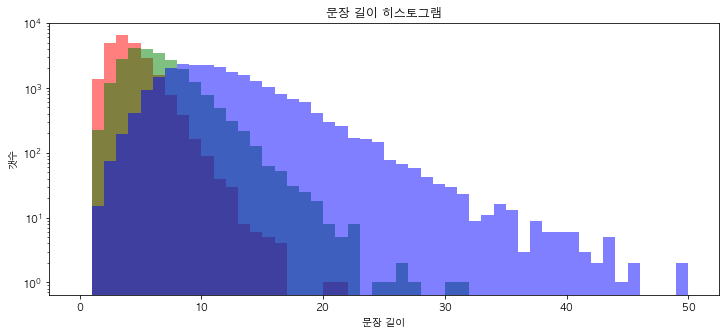

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='어절')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='형태소')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='음절')
plt.yscale('log')
plt.title('문장 길이 히스토그램')
plt.xlabel('문장 길이')
plt.ylabel('갯수')

In [12]:
import numpy as np

print('어절 최대길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간길이: {}'.format(np.median(sent_len_by_token)))
print('제 1 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대길이: 21
어절 최소길이: 1
어절 평균길이: 3.64
어절 길이 표준편차: 1.74
어절 중간길이: 3.0
제 1 사분위 길이: 2.0
제 3 사분위 길이: 5.0


In [13]:
print('형태소 최대길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(sent_len_by_morph)))
print('제 1 사분위 길이: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.83
형태소 길이 표준편차: 2.71
형태소 중간길이: 5.0
제 1 사분위 길이: 4.0
제 3 사분위 길이: 7.0


In [14]:
print('음절 최대길이: {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소길이: {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균길이: {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간길이: {}'.format(np.median(sent_len_by_eumjeol)))
print('제 1 사분위 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 75)))

음절 최대길이: 57
음절 최소길이: 1
음절 평균길이: 11.31
음절 길이 표준편차: 4.98
음절 중간길이: 10.0
제 1 사분위 길이: 8.0
제 3 사분위 길이: 14.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1437982d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1434979d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1433f8f10>,
 'medians': [<matplotlib.lines.Line2D at 0x14378fdd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x143799990>,
 'means': [<matplotlib.lines.Line2D at 0x143790cd0>,
  <matplotlib.lines.Line2D at 0x1436b92d0>]}

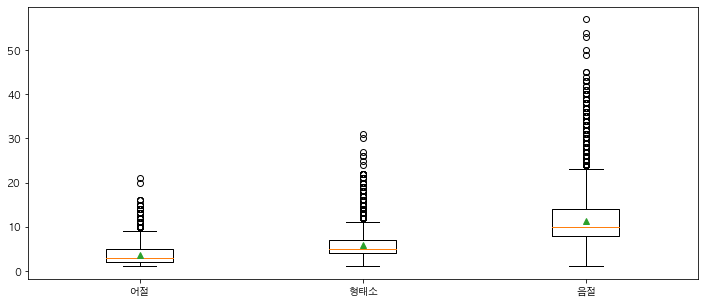

In [15]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol], labels=['어절', '형태소', '음절'], showmeans=True)

### 질문 / 답변 각각에 대한 문장 길이 분포 분석

In [24]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]
answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'num of tokens')

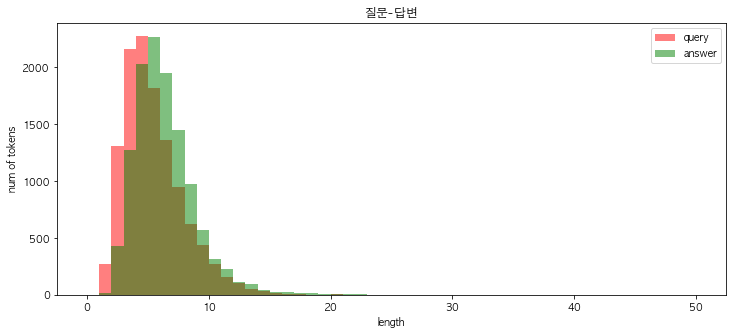

In [25]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='r', label='query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='answer')
plt.legend()
plt.title('질문-답변')
plt.xlabel('length')
plt.ylabel('num of tokens')

Text(0, 0.5, 'num of tokens')

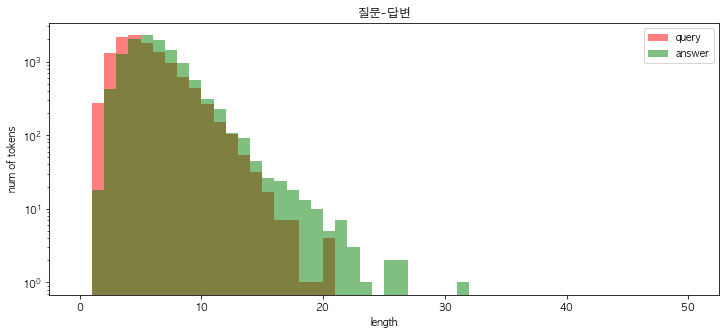

In [27]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='r', label='query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='answer')
plt.legend()
plt.yscale('log')
plt.title('질문-답변')
plt.xlabel('length')
plt.ylabel('num of tokens')

In [ ]:
plt.figure(figsize=(12, 5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph], labels=['query', 'answer'], showmeans=True)

* 이렇게 분석한 길이 값을 통해 모델에 적용될 문장의 최대 길이를 결정
    * 중간값이나 제3사분위 값 적용할 수도 있으나 실제로 통계를 반영한 길이 넣는 경우 성능 얻기 쉽지 않음
* 3사분위값 주변 탐색하며 학습 결과 문장 길이 25로 설정

### 데이터 어휘 빈도 분석

In [29]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)
            
for s in answer_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)

print(query_NVA_token_sentences)
query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)


['지망', '학교', '떨어졌어', '박', '박', '심하네', '카드', '망가졌어', '카드', '돼', '맞팔', '왜', '안하지', '시간', '낭비', '아는데', '매일', '중', '시간', '낭비', '자꾸', '보게', '됨', '보면나만', '빼고다', '행복해', '보여', '가끔', '궁금해', '가끔', '뭐', '하는지', '궁금해', '가끔', '혼자', '좋다', '가난한', '자의', '설움', '가만있어도', '땀', '가상', '화폐', '쫄', '망함', '가스', '불', '켜고', '나갔어', '가스', '불', '켜놓고', '나온거', '같아', '가스', '비', '나왔다', '가스', '비비', '싼데', '감기', '걸리겠어', '가스', '비장', '아님', '가장', '확실한건', '뭘', '까', '가족', '여행', '가기', '했어', '가족', '여행', '고고', '가족', '여행', '어디', '가지', '가족', '있어', '가족', '관계', '알려줘', '가족', '끼리', '여행', '간다', '가족', '보고싶어', '가족', '서먹해', '가족', '서먹해졌어', '가족', '어디가', '가족', '여행', '갈거야', '가족', '여행', '가야', '가족', '누구', '가족', '여행가', '려고', '가족', '스트레스', '풀었어', '가출', '할까', '가출', '해도', '갈데가', '없어', '간만', '떨리니까', '좋더라', '간만', '쇼핑', '간만', '휴식', '간식', '뭐', '먹을까', '간식', '추천', '간장', '치킨', '시켜야지', '간접흡연', '싫어', '고민', '돼', '감', '말랭이', '먹고싶다', '감', '말랭이', '먹어야지', '감기', '같', '애', '감기', '걸린것', '같아', '감기', '기운이있어', '감기', '들거', '같', '애', '감기가오려나', '감기', '약', '없어', '감기', '같', '

In [30]:
print(query_NVA_token_sentences)

지망 학교 떨어졌어 박 박 심하네 카드 망가졌어 카드 돼 맞팔 왜 안하지 시간 낭비 아는데 매일 중 시간 낭비 자꾸 보게 됨 보면나만 빼고다 행복해 보여 가끔 궁금해 가끔 뭐 하는지 궁금해 가끔 혼자 좋다 가난한 자의 설움 가만있어도 땀 가상 화폐 쫄 망함 가스 불 켜고 나갔어 가스 불 켜놓고 나온거 같아 가스 비 나왔다 가스 비비 싼데 감기 걸리겠어 가스 비장 아님 가장 확실한건 뭘 까 가족 여행 가기 했어 가족 여행 고고 가족 여행 어디 가지 가족 있어 가족 관계 알려줘 가족 끼리 여행 간다 가족 보고싶어 가족 서먹해 가족 서먹해졌어 가족 어디가 가족 여행 갈거야 가족 여행 가야 가족 누구 가족 여행가 려고 가족 스트레스 풀었어 가출 할까 가출 해도 갈데가 없어 간만 떨리니까 좋더라 간만 쇼핑 간만 휴식 간식 뭐 먹을까 간식 추천 간장 치킨 시켜야지 간접흡연 싫어 고민 돼 감 말랭이 먹고싶다 감 말랭이 먹어야지 감기 같 애 감기 걸린것 같아 감기 기운이있어 감기 들거 같 애 감기가오려나 감기 약 없어 감기 같 애 감미로운 목소리 좋아 감정 쓰레기통 엉망 진창 감정 컨트롤 하겠어 감정 컨트롤 이안 돼 감히 나를 무시 애가 있어 갑자기 나쁜 생각 막 들더라 갑자기 눈물나 갑자기 물어봐서 당황 했어 갑자기 불편한 사이 된거 같아 강렬한 첫인상 남겨야하는데 강아지 키우고싶어 강아지 키우고싶은데 역시안 돼겠지 강아지 키울수있을까 강아지 키울까 강원도 가서 살까 게임 자고 해도되 나 놀러 갈 친구 없어 먹었는데 나 살찐거 같아 수영장 가기 했어 같이있으면 힘든데 붙잡고싶어 피씨 방가 해볼까 할수있는 취미 생활 뭐 있을까 개강 입어볼까 개강 옷 예쁘게 입어볼까 개강 개강 개 같은 상황 개 되 버렸어 개 기름 꼈어 개념 놓고 옴 개념 없어 개 당황 개 당황 했잖아 갑자기 물어봐서 개인 업무 다시 켜 개인 일도 시켜 개 졸려 개 좋아 개학 좋다 무 싫다 걔 누굴 닮아서 그런거니 걔 같은 반 됐으면 좋겠다 거지같 이일해 놓고 갔어 거지 됐어 거짓말 했어 거짓말 나도 모르게 

In [32]:
from wordcloud import WordCloud

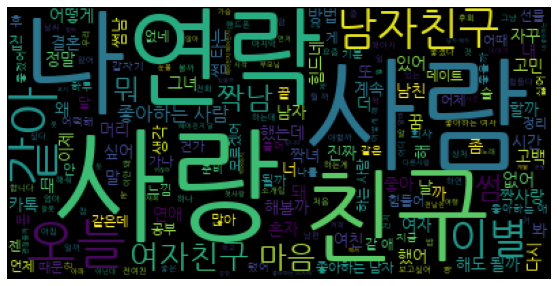

In [37]:
query_wordcloud = WordCloud(font_path = data_path + 'NanumGothic.ttf').generate(query_NVA_token_sentences)
plt.figure(figsize=(12, 5))
plt.imshow(query_wordcloud)
plt.axis('off')
plt.show()

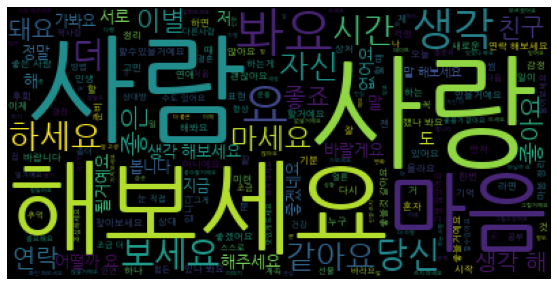

In [38]:
answer_wordcloud = WordCloud(font_path = data_path + 'NanumGothic.ttf').generate(answer_NVA_token_sentences)
plt.figure(figsize=(12, 5))
plt.imshow(answer_wordcloud)
plt.axis('off')
plt.show()

## Seq2Seq 모델